# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import math

Assigned my and sigma to their respective values

In [2]:
mu = 100
sigma = 10


def gau_dis(x):
    df = np.random.randn(x) * sigma + mu
    count = 0 ;
    for i in range(len(df)):
        if((df[i]>mu+sigma and df[i]<mu+2*sigma) or (df[i]>mu-2*sigma and df[i]<mu-sigma)):
            count = count +1;
        else:
            continue;
    return count/len(df)

calling the function of guassian distribution and passing different number of data points

In [3]:
print(gau_dis(10))
print(gau_dis(100))
print(gau_dis(1000))
print(gau_dis(10000))

0.2
0.26
0.254
0.2716


we can observe the value is coming close to 27.2%

<font color = 'blue'> Partially Correct : 9.5 points </font> 

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution

1. Adding a column named Genre, which tells the genre of the movie
2. Adding a column named Year, which will tell the year in which movie released.

Use cosine similarity using genre and year to find the similar movies. Greater the cosine similarity, more similar the movies are. Hence, similar rating.

<font color = 'red'> Incorrect : 0 points </font> 
For association analysis, we require binary asymmetric attributes.

Since each rating can take 6 possible values, we would need to replace it with 6 asymmetric binary attributes
of the form (rating == 0?) (rating == 1?) ...

This will give us 500 x 6 = **3000 binary attributes per user**.  
The resulting sparse data matrix would be **1000 rows x 3000 columns**.


### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

1. True

2. False

3. True

4. False, Noise is something which is created unwantedly

5. True, Outliers sometimes, though unusual are a part of data and genuine values

<font color = 'blue'> Partially Correct : 4 points </font> 

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

Carat - Quantitative(ratio), continuous
Color - Qualitative (Ordinal), discrete
Clarity - Qualitative (Ordinal), discrete
depth - Quantitative(ratio), continuous
table - Quantitative(ratio), continuous
price - Quantitative(ratio), continuous
x - Quantitative(ratio), continuous
y - Quantitative(ratio), continuous
z - Quantitative(ratio), continuous

<font color = 'green'> Correct : 5 points </font> 

#### Solution 4.2

importing data into data variable

In [4]:
data = pd.read_csv('/Users/nikhilmalkari/Downloads/diamonds.csv')

glance on the data

In [5]:
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<font color = 'blue'> Partially Correct : 1 points </font> 

#### Solution 4.3

Describing the data, and getting the stats of it

In [6]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
statistics.mode(data['carat'])

0.3

In [8]:
statistics.mode(data['depth'])

62.0

In [9]:
statistics.mode(data['table'])

56.0

In [10]:
statistics.mode(data['price'])

605

In [11]:
statistics.mode(data['x'])

4.37

In [12]:
statistics.mode(data['y'])

4.34

In [13]:
statistics.mode(data['z'])

2.7

IQR calculation

In [14]:
Q1 = np.percentile(data['price'], 25, interpolation = 'midpoint')
  
Q3 = np.percentile(data['price'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
  
print(IQR)

4374.5


<font color = 'blue'> Partially Correct : 4 points </font> 

#### Solution 4.4

Filtering the data and storing in other data frame 

In [38]:
data2 = data[(data["cut"] == "Premium") | (data["cut"] == "Very Good")]

In [16]:
data2.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
12,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
19,20,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66


Find the fraction of the cut named Very good and Premium 

In [17]:
data2['cut'].count()/data['cut'].count()

0.4796625880608083

Plotting a bar plot with all the cut types, with count on the x axis

/Users/nikhilmalkari/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


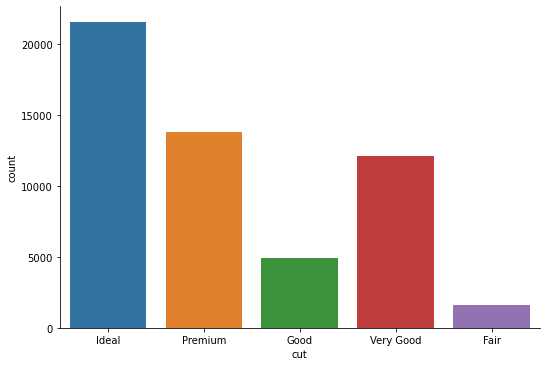

In [49]:
sns.factorplot(x='cut', data=data , kind='count',aspect=1.5 )

<font color = 'blue'>  Partially Correct : 1.25 points </font>

Plotting a histogram on carat

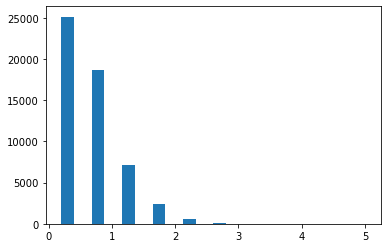

In [48]:
plt.hist(data['carat'],width=0.2)
plt.show() 

<font color='green'> Correct : 2 points </font> 

plotting a scatter plot between carat and price

<AxesSubplot:xlabel='carat', ylabel='price'>

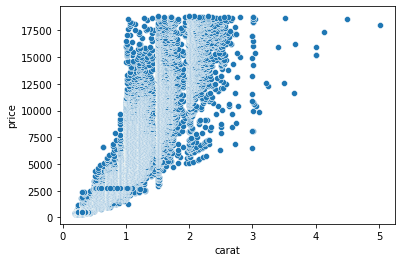

In [20]:
sns.scatterplot(data=data, x="carat", y="price")

<font color = 'green'> Correct : 2 points </font> 

Finding the correlation between carat and price

In [39]:
data['carat'].corr(data['price'])

0.9215913011934779

<font color='green'> Correct : 1 point </font> 

### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

A good measure of similarity for this purpose is cosine similarity

num=0
den11=0
den12=0
for i in range(n):
    num = num + (tf_ix*tf_iy)
    den11 = den11 + xtf_ix**2
    den12 = den12 + tf_iy**2
den11 = math.sqrt(den11)
den12 = math.sqrt(den12)

CS = num / (den11 * den12)

<font color = 'blue'> Partially Correct : 1.75 points </font> 

#### Solution 5.2

Transformed variable is easy to compute, since we get less number of values instead of large number of values which gets repeated.
TF_IDF targets the uniqueness and rareness

<font color = 'green'> Correct : 2 points </font> 

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

making a function named hamming to calculate hamming distance

In [40]:
def hamming(x,y):
    count1 =0

    for i in range(len(x)):
        if(x[i]!=y[i]):
            count1 = count1+1
        else:
            continue
            
    return count1


making a function named smc to calculate the Simple Matching Coefficient

In [25]:
def smc(x,y):
    count_11 = 0;
    count_00 =0;
    count_10 = 0;
    count_01 =0;
    
    for i in range(len(x)):
        if(x[i]==1 and y[i]==1):
            count_11 = count_11+1
        elif(x[i]==1 and y[i]==0):
            count_10 = count_10+1
        elif(x[i]==0 and y[i]==0):
            count_00 = count_00+1
        else:
            count_01 = count_01+1
        
    
    SMC = (count_11 + count_00)/(count_11 + count_10 + count_01 + count_00)
    
    return SMC

making a function named jaccard_sim to calculate the jaccard similarity

In [42]:
def jaccard_sim(x,y):
    count_11 = 0;
    count_00 =0;
    count_10 = 0;
    count_01 =0;
    
    for i in range(len(x)):
        if(x[i]==1 and y[i]==1):
            count_11 = count_11+1
        elif(x[i]==1 and y[i]==0):
            count_10 = count_10+1
        elif(x[i]==0 and y[i]==0):
            count_00 = count_00+1
        else:
            count_01 = count_01+1
        
    
    JSC = (count_11)/(count_11 + count_01 + count_00)
    
    return JSC

passing the arrays into all the methods

In [43]:
x = [1,0,1,0,1,0,1,0,1,0,1,0,1]
y = [1,0,0,0,1,0,0,0,1,0,0,0,1]


print(hamming(x,y))
print(smc(x,y))
print(jaccard_sim(x,y))

3
0.7692307692307693
0.4


<font color = 'blue'> Partially Correct : 4 points </font> 

### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

defining a function for cosine similarity

In [28]:
def cosine_similarity(x,y):
    num=0
    den11=0
    den12=0
    for i in range(len(x)):
        num = num + (x[i]*y[i])
        den11 = den11 + x[i]**2
        den12 = den12 + y[i]**2
    den11 = math.sqrt(den11)
    den12 = math.sqrt(den12)

    CS = num / (den11 * den12)
    
    return CS

defining a function named correlation

In [29]:
def correlation(x,y):
    sum1=0
    sum2=0
    num=0
    for i in range(len(x)):
        sum1 = sum1 + x[i]
        sum2 = sum2 + y[i]
    
    meanx = sum1/len(x)
    meany = sum2/len(y)
    
    for i in range(len(x)):
        num = num + ((x[i]-meanx)*(y[i]-meany))

    sdx = 0
    sdy = 0

    for i in range(len(x)):
        sdx = sdx + (x[i]-meanx)**2
        sdy = sdy + (y[i]-meany)**2

    sdx = math.sqrt(sdx)
    sdy = math.sqrt(sdy)
    
    COV = num/len(x)
    
    COR = COV/(sdx*sdy)
    
    return COR

defining a function named euclidean

In [30]:
def euclidean(x,y):
    sum=0
    for i in range(len(x)):
        sum = sum + (x[i]-y[i])**2
        
    EUC = math.sqrt(sum)
    
    return EUC

defining a function named jaccard distance

In [31]:
def jaccard_distance(x,y):
    a = jaccard_sim(x,y)
    
    JCD = 1-a
    
    return JCD

defining a function named lmax

In [32]:
def Lmax(x,y):
    max_diffx = x[1] - x[0]
    max_diffy = y[1] - y[0]
     
    for i in range(len(x)):
        for j in range( i+1, len(x) ):
            if(x[j] - x[i] > max_diffx):
                max_diffx = x[j] - x[i]
                
    for i in range(len(y)):
        for j in range( i+1, len(y) ):
            if(y[j] - y[i] > max_diffy):
                max_diffy = y[j] - y[i]
     
    if(max_diffx>max_diffy):
        return max_diffx
    else:
        return max_diffy

passing all the given arrays

In [45]:
x1 = [1,1,1,1]
y1 = [3,3,3,3]

x2 = [0,1,0,1,0,1]
y2 = [1,0,1,0,1,0]

x3 = [1,1,0,1,0,1]
y3 = [1,1,1,0,0,1]

print(cosine_similarity(x1,y1))
print(cosine_similarity(x2,y2))
print(cosine_similarity(x3,y3))

# correaltion of x1 and y1 gives infinity because of zero remainder
# print(correlation(x1,y1))
print(correlation(x2,y2))
print(correlation(x3,y3))

print(euclidean(x1,y1))
print(euclidean(x2,y2))

print(jaccard_distance(x2,y2))
print(jaccard_distance(x3,y3))

print(Lmax(x3,y3))

1.0
0.0
0.75
-0.16666666666666669
0.04166666666666666
4.0
2.449489742783178
1.0
0.4
1


<font color ='blue'> Partially Correct : 3 points </font> 

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.

<font color = 'green'> Total Score : 50 points </font> 